<a href="https://colab.research.google.com/github/inseungkang/Kaggle/blob/master/myEMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 3.1MB/s 
     |████████████████████████████████| 51kB 5.4MB/s 
     |████████████████████████████████| 358kB 9.7MB/s 
     |████████████████████████████████| 61kB 5.8MB/s 
     |████████████████████████████████| 1.0MB 9.3MB/s 
     |████████████████████████████████| 92kB 6.8MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 40kB 4.1MB/s 
     |████████████████████████████████| 51kB 5.1MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
     |████████████████████████████████| 2.6MB 15.1MB/s 
Mounted at /content/gdrive


In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from fastai.vision.all import *
from fastbook import *
matplotlib.rc('image', cmap='Greys')

data_dir = '/content/gdrive/My Drive/ML Data/Kaggle Data/EMNIST/'
train_path = data_dir + 'emnist-mnist-train.csv'
# test_path = data_dir + 'emnist-mnist-test.csv'
train_data = pd.read_csv(train_path, sep=",", header=None)
# train_data = train_data.to_numpy().tolist()
# test_data = pd.read_csv(test_path, sep=",", header=None)
# train_Y = tensor(train_data.iloc[:,0]).unsqueeze(1)
# train_X = torch.reshape(tensor(train_data.iloc[:,1:]), (60000, 28, 28))
def get_items(path):
  train_temp = pd.read_csv(train_path)
  return train_temp.to_numpy().tolist()

def get_x(item):
  x = np.array(item[1:]).reshape(28,28).astype(np.uint8)
  return x

In [13]:
db = DataBlock(blocks=(ImageBlock, CategoryBlock),
               get_items=get_items,
               get_x=get_x,
               get_y=lambda train_temp: train_temp[0],
               splitter=RandomSplitter(seed=42),
               item_tfms=Resize(224),
               batch_tfms=aug_transforms())
dls = DataLoaders.from_dblock(db, df=train_data, source=data_dir)
# db.summary(db, df=train_data, path=data_dir)

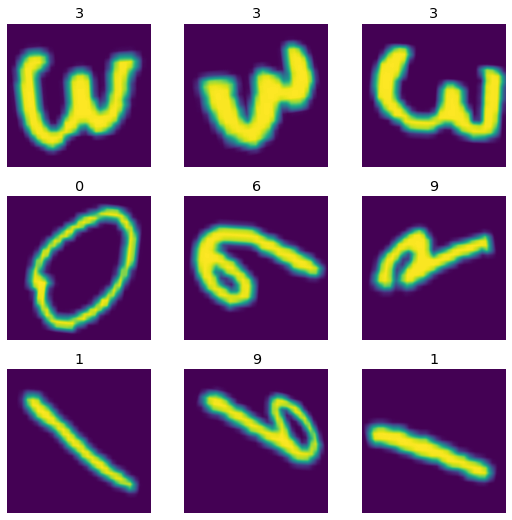

In [14]:
dls.show_batch()

In [ ]:
lr = 0.1
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,time
